In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 12)

In [2]:
emotion_score = pd.read_csv('Manhattan_score_raw.txt', index_col=0, sep='\s+')
emotion_score['photo_take_date'] = emotion_score['photo_take_date'].astype('datetime64[ns]')
emotion_score.set_index('photo_take_date', inplace=True)
emotion_score.tail()

,contempt,disgust,fear,happiness,neutral,sadness,surprise,lat,lon,emotion_score
photo_take_date,,,,,,,,,,
2016-12-31,8.250000e-12,4.110000e-13,8.490000e-15,1.000000,1.260000e-11,2.090000e-12,3.600000e-12,40.756221,-73.98645,-0.671040
2016-12-31,4.780000e-08,4.080000e-06,6.310000e-11,0.999995,8.890000e-09,1.310000e-08,1.900000e-08,40.756221,-73.98645,-0.671036
2016-12-31,2.060000e-08,1.250000e-05,1.150000e-08,0.999965,1.420000e-07,1.170000e-07,7.390000e-07,40.756221,-73.98645,-0.671014
2016-12-31,9.870000e-06,3.960000e-07,7.290000e-11,0.999988,1.500000e-07,2.120000e-09,3.450000e-08,40.756221,-73.98645,-0.671031
2016-12-31,2.460000e-10,8.700000e-10,1.380000e-14,1.000000,1.470000e-10,2.570000e-11,3.340000e-11,40.756221,-73.98645,-0.671040


In [3]:
stock = pd.read_csv('NASDAQ_data.txt', sep='\s+', index_col=0)
stock.index = stock.index.astype('datetime64[ns]')
stock.tail()

,Open,High,Low,Close
Date,,,,
2016-12-23,5441.759766,5462.689941,5441.759766,5462.689941
2016-12-27,5470.759766,5512.370117,5469.609863,5487.439941
2016-12-28,5497.439941,5498.910156,5434.700195,5438.560059
2016-12-29,5437.509766,5450.629883,5415.180176,5432.089844
2016-12-30,5440.169922,5441.899902,5371.890137,5383.120117


数据读入完毕，开始按照一定的时间段进行汇总并计算相关性

按照周来进行相关（之前有考虑过照片过少而导致的拟合的问题，现在先不考虑这个情况）
`count = emotion_all['emotion_score'].resample('MS').count()`

In [4]:
gp1 = emotion_score['emotion_score'].resample('MS').mean()
std1 = gp1.std()
miu1 = gp1.mean()
gp11 = (gp1-miu1)/std1  ## 此处进行了汇总之后才进行了归一化，如果不做汇总，归一化结果图像是沿着坐标中紧密波动的
gp11.tail()

photo_take_date
2016-08-01   -0.898877
2016-09-01   -1.019949
2016-10-01    0.464124
2016-11-01    0.183751
2016-12-01   -1.211724
Freq: MS, Name: emotion_score, dtype: float64

In [5]:
gp2 = stock['Close'].resample('MS').mean()
std2 = gp2.std()
miu2 = gp2.mean()
gp22 = (gp2-miu2) /std2
gp22.tail()

Date
2016-08-01    1.271699
2016-09-01    1.316384
2016-10-01    1.318594
2016-11-01    1.324103
2016-12-01    1.507764
Freq: MS, Name: Close, dtype: float64

相关系数 为 0.5937138203689687


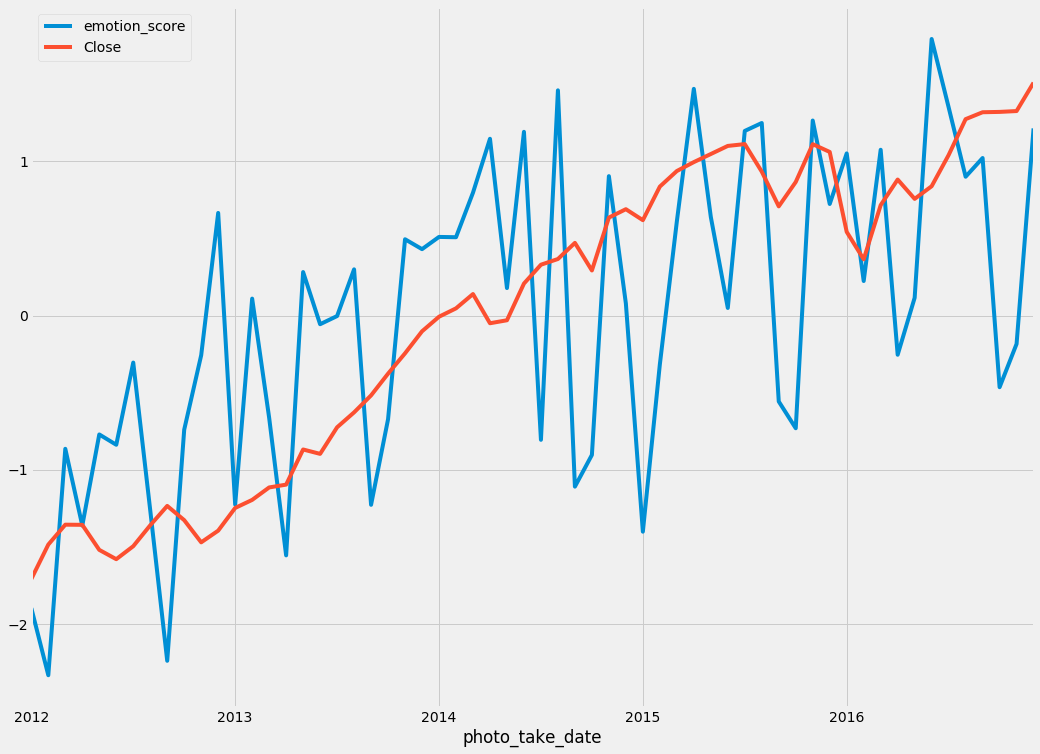

In [6]:
df = pd.concat([-gp11, gp22], axis=1, join='inner') # 第一次跑发现是情绪是相反的，所以前面加上负号，便于趋势一致
df.plot()
print("相关系数 为 {}".format(df.corr()['emotion_score']['Close']))